# Correção de exercício Cap 03 - Exercício 14
---


In [1]:
%matplotlib notebook
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import pandas as pd

df=pd.read_table('./data/temperatura.txt',sep='\s',header=0, engine='python')

df.head()

,Xi,Y1
0,240,-6.59
1,245,-5.46
2,250,-4.17
3,255,-3.10
4,260,-2.12


<IPython.core.display.Javascript object>


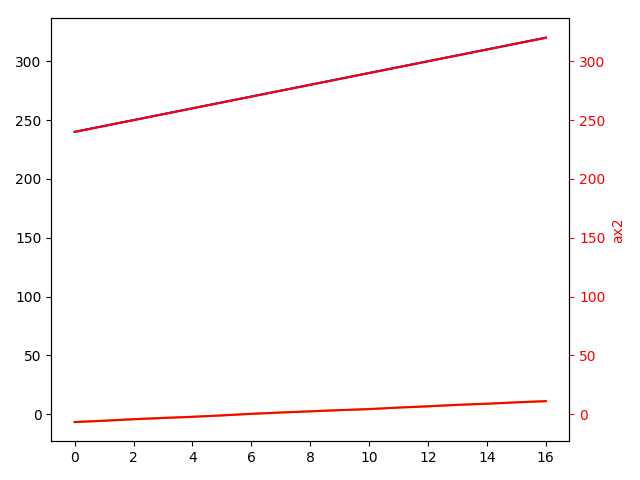

In [13]:
fig, ax1 = plt.subplots()
ax1.plot(df.Xi, 'b')
ax1.plot(df.Y1, 'y')

#ax1.set_xlabel('time (s)')
# Make the y-axis label, ticks and tick labels match the line color.

ax2 = ax1.twinx()
ax2.plot(df.Xi, 'r')
ax2.plot(df.Y1, 'r')

ax2.set_ylabel('ax2', color='r')
ax2.tick_params('y', colors='r')

fig.tight_layout()


<IPython.core.display.Javascript object>


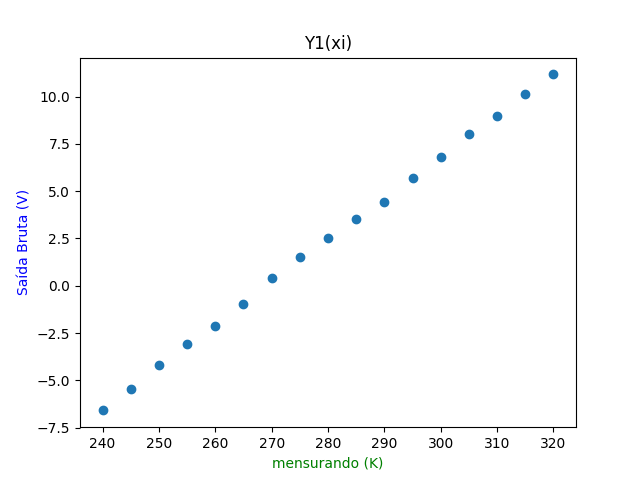

In [5]:
fig, ax1 = plt.subplots()
ax1.set_title('Y1(xi)')
ax1.set_ylabel('Saída Bruta (V)', color='b')
ax1.set_xlabel('mensurando (K)', color='g')

plt.plot(df.Xi,df.Y1,'o')
plt.show()

### Método dos Mínimos Quadrados
#### _Para achar a função de calibração_

\\( D = N\sum{Y^{2}} - (\sum{Y})^2 \\)

\\( c_{0} = (\sum{X}\sum{Y^2}\,-\,\sum{Y}\sum{XY}) / D \\)

\\( c_{1} = (N\sum{XY}\,-\,\sum{X}\sum{Y}) / D \\)



In [66]:
#N número de pontos/dados/valores
N = df.Y1.size 
D = N * sum(df.Y1**2) - sum(df.Y1)**2
#592.08848258 print(D)
c0 = ( (sum(df.Xi) * sum(df.Y1**2)) - (sum(df.Y1)  * sum(df.Xi * df.Y1)) ) / D
c1 = ( (N * sum(df.Xi * df.Y1) - (sum(df.Xi) * sum(df.Y1))) ) / D
print(' N = %s \n D = %s \n c0 = %s K \n c1 = %s K/V' % (N,D,c0,c1))

 N = 17 
 D = 8503.9884 
 c0 = 269.146414581 K 
 c1 = 4.51458165206 K/V


In [67]:
df['X1'] = c0+c1*df.Y1       # Saída calibrada
df['erro'] = df.X1 - df.Xi   # Estimativa de erro

In [52]:
print(df)

     Xi     Y1          X1      erro
0   240  -6.59  239.395321 -0.604679
1   245  -5.46  244.496799 -0.503201
2   250  -4.17  250.320609  0.320609
3   255  -3.10  255.151211  0.151211
4   260  -2.12  259.575501 -0.424499
5   265  -0.95  264.857562 -0.142438
6   270   0.41  270.997393  0.997393
7   275   1.51  275.963433  0.963433
8   280   2.53  280.568306  0.568306
9   285   3.54  285.128034  0.128034
10  290   4.42  289.100865 -0.899135
11  295   5.72  294.969822 -0.030178
12  300   6.79  299.800424 -0.199576
13  305   8.03  305.398505  0.398505
14  310   8.98  309.687358 -0.312642
15  315  10.16  315.014564  0.014564
16  320  11.17  319.574292 -0.425708


In [61]:
# Viés (bias)
vies = df.erro.mean()
erro2 = (df.erro**2).mean()

desvio_padrao = np.sqrt( sum((df.erro - vies)**2)/(N-1) )

print(" Bias/viés = %s K \n Imprecisão = %s K \n Inacurácia = %s ± %s K" % (vies,desvio_padrao,vies,desvio_padrao))
print(80*"=")


 Bias/viés = -7.18902062063e-14 K 
 Imprecisão = 0.530007432885 K 
 Inacurácia = -7.18902062063e-14 ± 0.530007432885 K


In [65]:
print(df.cov())
print(df.corr())

              Xi            Y1            X1          erro
Xi    637.500000  1.411469e+02  6.372191e+02 -2.809079e-01
Y1    141.146875  3.126466e+01  1.411469e+02  5.551115e-16
X1    637.219092  1.411469e+02  6.372191e+02  5.995204e-15
erro   -0.280908  5.551115e-16  5.995204e-15  2.809079e-01
            Xi            Y1            X1          erro
Xi    1.000000  9.997797e-01  9.997797e-01 -2.099142e-02
Y1    0.999780  1.000000e+00  1.000000e+00  1.873145e-16
X1    0.999780  1.000000e+00  1.000000e+00  4.812956e-16
erro -0.020991  1.873145e-16  4.812956e-16  1.000000e+00


## Resumo
---
### Equação de Transferência : (serve para achar a reta de ajuste)
\\( \hat{Y_1} = a_0 - a_1 Y_1 \\)

### Equação de Calibração :
\\( X_1 = c_0 - c_1 Y_1 \\)


<IPython.core.display.Javascript object>


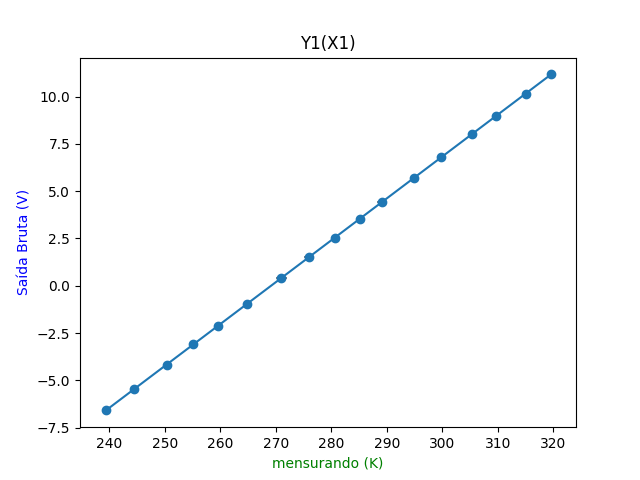

In [68]:
fig, ax1 = plt.subplots()
ax1.set_title('Y1(X1)')
ax1.set_ylabel('Saída Bruta (V)', color='b')
ax1.set_xlabel('mensurando (K)', color='g')

#plt.plot(df.Xi,df.Y1,'+',color='r')
                                # vezez 10 para aparecer melhor.
ax1.errorbar(df.X1,df.Y1, xerr=df.erro, fmt="-o", ecolor='grey', capthick=2)
plt.show()